# Calculation of atomic spectra in crystal field

This notebook introduces the code for calculating the energy spectrum of single magnetic atoms in environments of various symmetry.

## Loading the libraries

In [1]:
%pylab inline
from ipywidgets import interact
from pyatoms.J.SingleAtom import SingleAtom
import mpmath as mp

Populating the interactive namespace from numpy and matplotlib


## Defining the atom

We take a Holmium atom in 3-fold symmetry adsorption sites (e.g. Pt(111)).
The first argument is the value of the total angular momentum, the second one the orbital momentum of the magnetization electrons.

In [2]:
Ho = SingleAtom(8, 3)
Ho.CF.setSymmetry("C3v")

The crystal field operator is a sum of Stevens' operators corresponding to the desired symmetry (Stevens, 1952).
We are going to use crystal field parameters published by Donati et al. (2014). The energy units are millielectronvolts by default.

In [3]:
Ho.CF.setCoefficient(2, 0, -140e-3)
Ho.CF.setCoefficient(4, 0, 1.06e-3)

We plot the energy spectrum as function of the expectation value of the $J_z$ operator ($\left<\hat{J}_z\right>$). As we have only defined uniaxial anisotropy so far, all the states are $J_z$ eigenstates and form dimers (except for $J_z=0$ state).

(-8.5, 8.5)

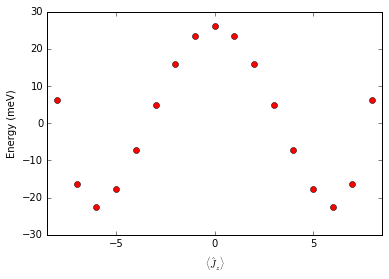

In [4]:
plot(Ho.Js, Ho.Es, 'ro')
ylabel("Energy (meV)")
xlabel(r"$\left<\hat{J}_z\right>$")
xlim(-8.5, 8.5)

Adding a transversal term leads to creation of singlets at every third state (C3v).

(-8.5, 8.5)

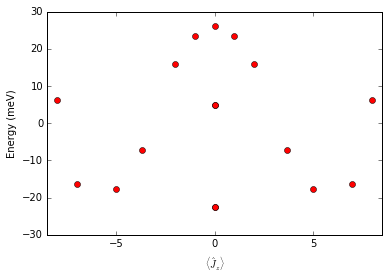

In [5]:
Ho.CF.setCoefficient(4, 3, 1e-3)
plot(Ho.Js, Ho.Es, 'ro')
ylabel("Energy (meV)")
xlabel(r"$\left<\hat{J}_z\right>$")
xlim(-8.5, 8.5)

## Magnetic Field

Application of magnetic field splits the singlets again.

(-8.5, 8.5)

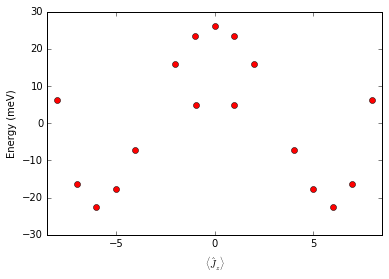

In [6]:
Ho.ZT.setBz(1e-3)
plot(Ho.Js, Ho.Es, 'ro')
ylabel("Energy (meV)")
xlabel(r"$\left<\hat{J}_z\right>$")
xlim(-8.5, 8.5)

Magnetic field can be applied in any direction. One can observe e.g. the effect of rotating the field vector from z to x axis.

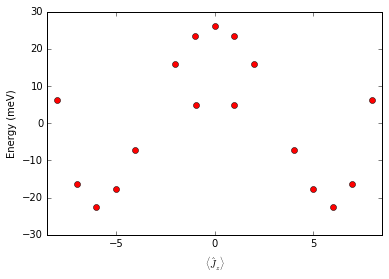

In [7]:
@interact(theta=(0, pi/2, pi/12))
def _plt(theta=0):
    Ho.ZT.setBtheta(theta)
    plot(Ho.Js, Ho.Es, 'ro')
    ylabel("Energy (meV)")
    xlabel(r"$\left<\hat{J}_z\right>$")
    xlim(-8.5, 8.5)

## Transitions

We can calculate the matrix elements of an arbitrary operator between the eigenstates of the Hamiltonian. For example, we could see what states are coupled together by the $\hat{J}_+$ operator.

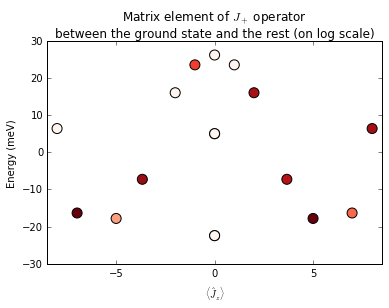

In [8]:
Ho.ZT.setBxyz(0,0,0)
colors = log(abs(asarray(Ho.transitions(Ho.Jp)[0][0,:].tolist(), dtype=float)))
scatter(Ho.Js, Ho.Es, s=100, c=colors, cmap='Reds', vmin=-20, vmax=0, edgecolors="k")
ylabel("Energy (meV)")
xlabel(r"$\left<\hat{J}_z\right>$")
xlim(-8.5, 8.5)
title("Matrix element of $J_+$ operator\nbetween the ground state and the rest (on log scale)")

To calculate transition probabilities between states through an operator of the form $\vec{\sigma}\vec{J}$, we use the function `J_transitions`, that uses the formula $$p_{i\to f} = \frac1{J(J+1)}\left[|\left<f\middle|J_z\middle|i\right>|^2 + \frac12\left(|\left<f\middle|J_+\middle|i\right>|^2 + |\left<f\middle|J_-\middle|i\right>|^2\right)\right]$$
(see Hirjibehedin et al., 2007)

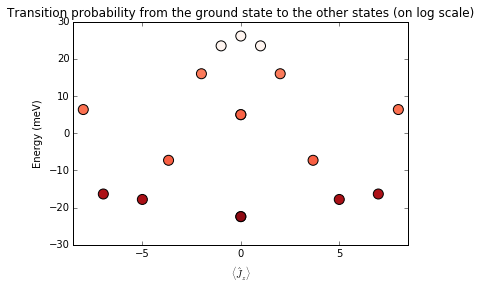

In [9]:
Ho.ZT.setBxyz(0,0,0)
colors = log(abs(asarray(Ho.J_transitions()[0,:].tolist(), dtype=float)))
scatter(Ho.Js, Ho.Es, s=100, c=colors, cmap='Reds', vmin=-20, vmax=1, edgecolors="k")
ylabel("Energy (meV)")
xlabel(r"$\left<\hat{J}_z\right>$")
xlim(-8.5, 8.5)
title("Transition probability from the ground state to the other states (on log scale)")

## Different environment

Let us now consider a different set of crystal field parameters (Miyamachi et al. 2012). Here the ground states do not mix, so we get a doublet.

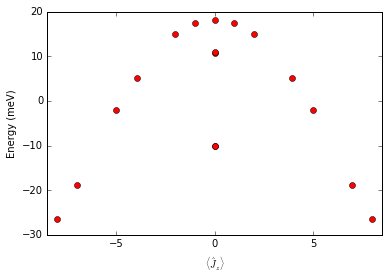

In [10]:
Ho.CF.setCoefficient(2,0,-0.239068)
Ho.CF.setCoefficient(4,0,8.59023e-5)
Ho.CF.setCoefficient(4,3,2.93446e-5)
Ho.CF.setCoefficient(6,0,1.86782e-7)
Ho.CF.setCoefficient(6,3,-1.96786e-6)
Ho.CF.setCoefficient(6,6,6.30483e-7)

plot(Ho.Js, Ho.Es, 'ro')
ylabel("Energy (meV)")
xlabel(r"$\left<\hat{J}_z\right>$")
xlim(-8.5, 8.5);

Note that the probability of a transition to the other side of the parabola is very low.

Transition probability within the ground doublet: 2.91773130197866e-31
Transition probability to the first excited state: 0.111121635204454


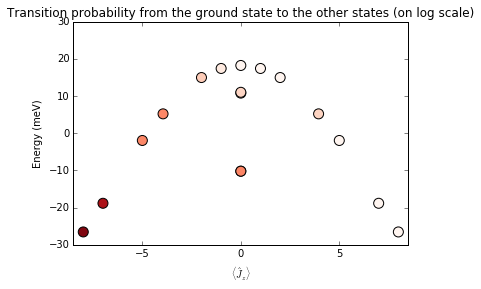

In [11]:
colors = log(abs(asarray(Ho.J_transitions()[0,:].tolist(), dtype=float)))
scatter(Ho.Js, Ho.Es, s=100, c=colors, cmap='Reds', vmin=-20, vmax=1, edgecolors="k")
ylabel("Energy (meV)")
xlabel(r"$\left<\hat{J}_z\right>$")
xlim(-8.5, 8.5)
title("Transition probability from the ground state to the other states (on log scale)")

print("Transition probability within the ground doublet: {}".format(Ho.J_transitions()[0,1]))
print("Transition probability to the first excited state: {}".format(Ho.J_transitions()[0,2]))

The actual probability of transitions within the doublet should be zero. We can increase the precision to see the probability decrease.

In [12]:
print("Transition probability within the ground doublet: {}".format(mp.nstr(Ho.J_transitions()[0,1], 3)))
with mp.workdps(200):
    Ho = SingleAtom(8, 3)
    Ho.CF.setSymmetry("C3v")
    Ho.CF.setCoefficient(2, 0, -0.239068)
    Ho.CF.setCoefficient(4, 0, 8.59023e-5)
    Ho.CF.setCoefficient(4, 3, 2.93446e-5)
    Ho.CF.setCoefficient(6, 0, 1.86782e-7)
    Ho.CF.setCoefficient(6, 3, -1.96786e-6)
    Ho.CF.setCoefficient(6, 6, 6.30483e-7)    
    print("Transition probability within the ground doublet: {}".format(mp.nstr(Ho.J_transitions()[0,1], 3)))

Transition probability within the ground doublet: 2.92e-31
Transition probability within the ground doublet: 5.82e-403
